In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
#load the data
car_data = pd.read_csv("CarPrice_Assignment.csv")
#print the few rows of the data
car_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [44]:
#cheking the number of data
car_data.shape

(205, 26)

In [45]:
#finding more info
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [46]:
#checking distribution of categorial variable
print(car_data['fueltype'].value_counts())
print(car_data['aspiration'].value_counts())
print(car_data['doornumber'].value_counts())
print(car_data['carbody'].value_counts())
print(car_data['drivewheel'].value_counts())
print(car_data['enginelocation'].value_counts())
print(car_data['enginetype'].value_counts())
print(car_data['cylindernumber'].value_counts())
print(car_data['fuelsystem'].value_counts())


fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


In [62]:
# econding the categorial variable
car_data.replace({'fueltype':{'diesel':0,'gas':1}},inplace = True)
car_data.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace = True)
car_data.replace({'aspiration':{'std':0,'turbo':1}},inplace = True)
car_data.replace({'doornumber':{'four':0,'two':1}},inplace = True)
car_data.replace({'enginelocation':{'front':0,'rear':1}},inplace = True)
car_data.replace({'drivewheel':{'rwd':0,'fwd':1,'4wd':2}},inplace = True)
car_data.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'convertible':3,'hardtop':4}},inplace = True)
car_data.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace = True)
car_data.replace({'enginetype':{'dohc':0,'ohcv':1,'ohc':2,'l':3,'rotor':4,'ohcf':5,'dohcv':6}},inplace = True)



In [63]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,3,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,3,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


Splitting the data

In [66]:
X = car_data.drop(['price','CarName','car_ID'],axis = 1)
y = car_data['price']

#ensure all columns are numeric
for col in X.columns:
  if X[col].dtype == 'object':
    print(f"String found in column:{col}")
X = X.apply(pd.to_numeric)
#split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 42)

In [64]:
print(X_train.shape)
print(X_test.shape)

(184, 23)
(21, 23)


In [67]:
from sklearn.linear_model import LinearRegression
#make the model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

Evaluating Model

In [70]:
y_pred = lin_model.predict(X_test)
#r score
score= lin_model.score(X_test,y_test)
print(score)

0.9439976863540096


In [72]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#mse
mse = mean_squared_error(y_test,y_pred)
print("mse:",mse)
#mae
mae = mean_absolute_error(y_test,y_pred)
print("mae:",mae)
#r2 score
r2 = r2_score(y_test,y_pred)
print("r2:",r2)


mse: 4485272.098379917
mae: 1605.604019969708
r2: 0.9439976863540096


Visualize

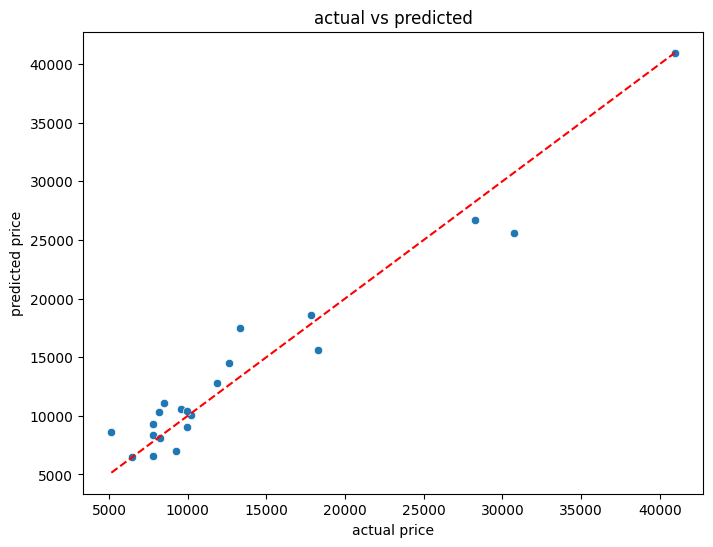

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual vs predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

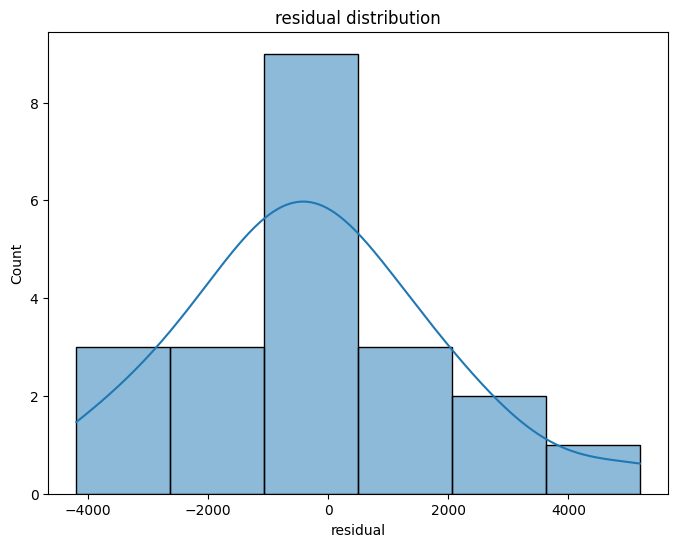

In [76]:
residual = y_test - y_pred
plt.figure(figsize = (8,6))
sns.histplot(residual, kde = True)
plt.xlabel('residual')
plt.title("residual distribution")
plt.show()